<a href="https://colab.research.google.com/github/nforoza/machinelearning/blob/master/Nahuel_lending_club_hw_trees_starteripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
lc_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')

In [ ]:
lc_data.dropna(axis=1, inplace=True) # Dropping NANs

In [ ]:
lc_data.head()

Unnamed: 0        id  ...  total_il_high_credit_limit  debt_settlement_flag
0       65230  92451797  ...                     11614.0                     N
1       36521  94187830  ...                     30983.0                     N
2       25712  93882482  ...                     38489.0                     N
3       92973  91238602  ...                     27002.0                     N
4       16335  94465406  ...                     50522.0                     N

[5 rows x 90 columns]

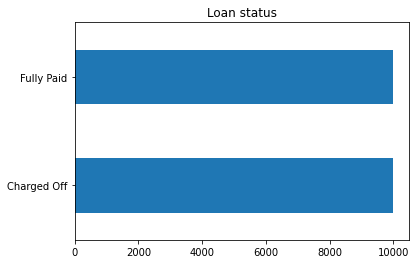

In [ ]:
lc_data.loan_status.value_counts().plot(kind='barh', title='Loan status')
plt.show() 

In [ ]:
lc_data.loan_status = lc_data.loan_status.replace({'Charged Off':1, 'Fully Paid':0})
y = lc_data.pop('loan_status')

In [ ]:
categorical_cols = [
  'term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan']
categorical_cols

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan']

In [ ]:
numerical_columns = [
  'loan_amnt',
  'installment',
  'delinq_2yrs',
  'fico_range_low',
  'fico_range_high',
  'total_acc'
]
numerical_columns

['loan_amnt',
 'installment',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'total_acc']

In [ ]:
lc_data_subset = lc_data[numerical_columns + categorical_cols]
lc_data_subset.head()

loan_amnt  installment  delinq_2yrs  ...  verification_status   issue_d  pymnt_plan
0    26450.0       685.99          2.0  ...         Not Verified  Nov-2016           n
1    12000.0       395.37          0.0  ...      Source Verified  Nov-2016           n
2     1000.0        35.16          0.0  ...      Source Verified  Dec-2016           n
3    10000.0       327.34          0.0  ...             Verified  Oct-2016           n
4     4500.0       181.89          0.0  ...             Verified  Dec-2016           n

[5 rows x 13 columns]

In [ ]:
# Create dummy variables
lc_data_subset = pd.get_dummies(data = lc_data_subset, columns=categorical_cols, drop_first=False)
lc_data_subset

loan_amnt  installment  ...  issue_d_Oct-2016  pymnt_plan_n
0        26450.0       685.99  ...                 0             1
1        12000.0       395.37  ...                 0             1
2         1000.0        35.16  ...                 0             1
3        10000.0       327.34  ...                 1             1
4         4500.0       181.89  ...                 0             1
...          ...          ...  ...               ...           ...
19995    12000.0       369.95  ...                 1             1
19996     7300.0       256.62  ...                 1             1
19997    12600.0       344.36  ...                 0             1
19998    16000.0       380.56  ...                 1             1
19999    10400.0       252.86  ...                 0             1

[20000 rows x 61 columns]

In [ ]:
X = lc_data_subset

# Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [ ]:
X_train.head()

loan_amnt  installment  ...  issue_d_Oct-2016  pymnt_plan_n
13112     5000.0       156.66  ...                 1             1
928      10125.0       346.00  ...                 1             1
2870     32850.0      1171.03  ...                 0             1
15303     7500.0       247.29  ...                 0             1
18595    12000.0       304.66  ...                 0             1

[5 rows x 61 columns]

# Decision Tree

In [ ]:


dt_model = DecisionTreeClassifier()

print(dt_model)

dt_model = dt_model.fit(X_train,y_train)
pred_dt = dt_model.predict_proba(X_valid)[:, 1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.188923 to fit



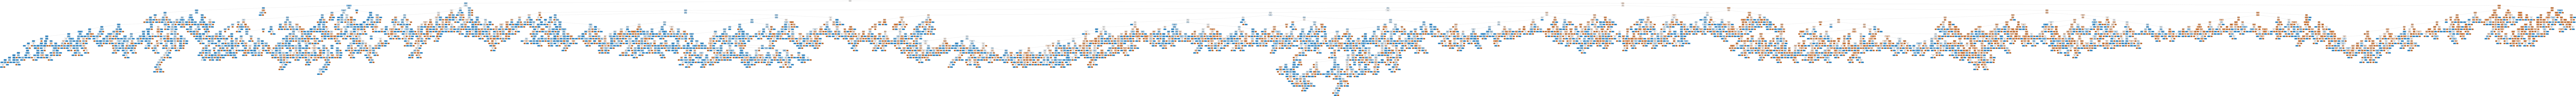

In [ ]:
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Paid', 'Charged Off'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
pred_dt_binary = dt_model.predict(X_valid)
print(classification_report(y_valid, pred_dt_binary))

              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1896
           1       0.55      0.55      0.55      1854

    accuracy                           0.55      3750
   macro avg       0.55      0.55      0.55      3750
weighted avg       0.55      0.55      0.55      3750



# Evaluating model

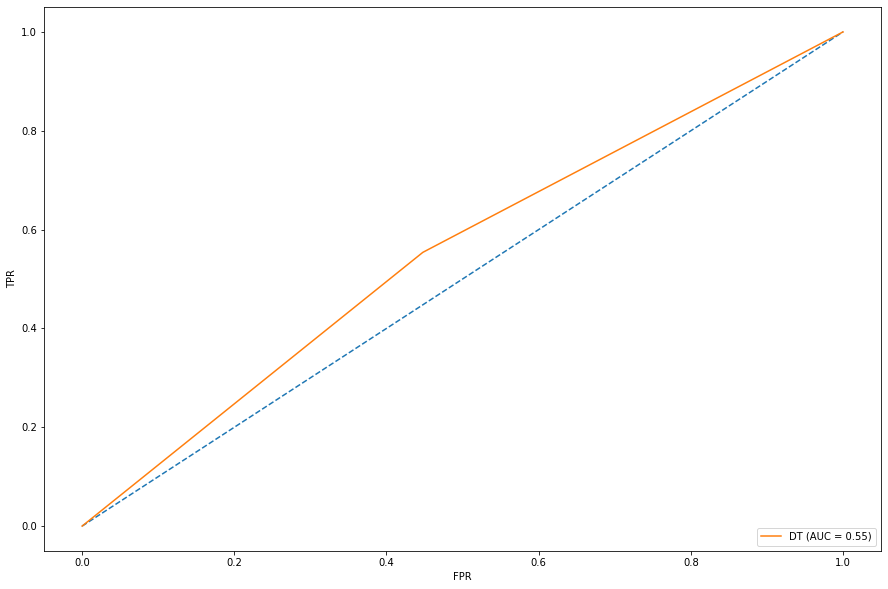

In [ ]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

Homework begins here

In [ ]:
# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

From Excel Dictionary

In [ ]:
browseNotes = ['zip_code','verified_status_joint','url','totalBcLimit','totalBalExMort','totalAcc','total_rev_hi_lim  ','total_il_high_credit_limit','total_cu_tl','total_bal_il','tot_hi_cred_lim','tot_cur_bal','tot_coll_amt','title','term','tax_liens','subGrade','serviceFeeRate','sec_app_revol_util ','sec_app_open_act_il','sec_app_open_acc ','sec_app_num_rev_accts ','sec_app_mths_since_last_major_derog ','sec_app_mort_acc ','sec_app_inq_last_6mths ','sec_app_fico_range_low ','sec_app_fico_range_high ','sec_app_earliest_cr_line ','sec_app_collections_12_mths_ex_med ','sec_app_chargeoff_within_12_mths ','revolUtil','revolBal','revol_bal_joint ','reviewStatusD','reviewStatus','purpose','pubRec','pub_rec_bankruptcies','percentBcGt75','pct_tl_nvr_dlq','openAcc','open_rv_24m','open_rv_12m','open_il_24m','open_il_12m','open_act_il','open_acc_6m','num_tl_op_past_12m','num_tl_90g_dpd_24m','num_tl_30dpd','num_tl_120dpd_2m','num_sats','num_rev_tl_bal_gt_0','num_rev_accts','num_op_rev_tl','num_il_tl','num_bc_tl','num_bc_sats','num_actv_rev_tl','num_actv_bc_tl','num_accts_ever_120_pd','mthsSinceRecentRevolDelinq','mthsSinceRecentLoanDelinq','mthsSinceRecentBc','mthsSinceMostRecentInq','mthsSinceLastRecord','mthsSinceLastDelinq','mths_since_rcnt_il','mths_since_oldest_il_open','mths_since_last_major_derog','msa','mortAcc','mo_sin_rcnt_tl','mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op','memberId','max_bal_bc','loanAmnt','listD','isIncV','intRate','installment','inqLast6Mths','inq_last_12m','inq_fi','initialListStatus','ils_exp_d','il_util','id','homeOwnership','grade','fundedAmnt','ficoRangeLow','ficoRangeHigh','expDefaultRate','expD','empLength','emp_title','effective_int_rate','earliestCrLine','dti_joint','dti','disbursement_method','desc','delinqAmnt','delinq2Yrs','creditPullD','collections_12_mths_ex_med','chargeoff_within_12_mths','bcUtil','bcOpenToBuy','avg_cur_bal','application_type','annualInc','annual_inc_joint','all_util','addrState','accOpenPast24Mths','accNowDelinq','acceptD']

In [ ]:
RejectStats = ['Amount Requested','Application Date','Loan Title','Risk_Score','Debt-To-Income Ratio','Zip Code','State','Employment Length','Policy Code']

In [ ]:
LoanStats = ['acc_now_delinq','acc_open_past_24mths','addr_state','all_util','annual_inc','annual_inc_joint','application_type','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med','delinq_2yrs','delinq_amnt','desc','dti','dti_joint','earliest_cr_line','emp_length','emp_title','fico_range_high','fico_range_low','funded_amnt','funded_amnt_inv','grade','home_ownership','id','il_util','initial_list_status','inq_fi','inq_last_12m','inq_last_6mths','installment','int_rate','issue_d','last_credit_pull_d','last_fico_range_high','last_fico_range_low','last_pymnt_amnt','last_pymnt_d','loan_amnt','loan_status','max_bal_bc','member_id','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_last_delinq','mths_since_last_major_derog','mths_since_last_record','mths_since_rcnt_il','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','next_pymnt_d','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','open_acc','open_acc_6m','open_il_12m','open_il_24m','open_act_il','open_rv_12m','open_rv_24m','out_prncp','out_prncp_inv','pct_tl_nvr_dlq','percent_bc_gt_75','policy_code','pub_rec','pub_rec_bankruptcies','purpose','pymnt_plan','recoveries','revol_bal','revol_util','sub_grade','tax_liens','term','title','tot_coll_amt','tot_cur_bal','tot_hi_cred_lim','total_acc','total_bal_ex_mort','total_bal_il','total_bc_limit','total_cu_tl','total_il_high_credit_limit','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp','total_rev_hi_lim  ','url','verification_status','verified_status_joint','zip_code','revol_bal_joint ','sec_app_fico_range_low ','sec_app_fico_range_high ','sec_app_earliest_cr_line ','sec_app_inq_last_6mths ','sec_app_mort_acc ','sec_app_open_acc ','sec_app_revol_util ','sec_app_open_act_il','sec_app_num_rev_accts ','sec_app_chargeoff_within_12_mths ','sec_app_collections_12_mths_ex_med ','sec_app_mths_since_last_major_derog ','hardship_flag','hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount','disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term']


Functions to replicate experiment in Validation

In [ ]:
def load_data(url):
  #url assert missing here
  df = pd.read_csv(url)
  print('Df loaded with shape: ' ,df.shape)
  return df 

In [ ]:
lending_df = load_data('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')

Df loaded with shape:  (20000, 151)


EDA

In [ ]:
lending_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 151 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  20000 non-null  int64  
 1   id                                          20000 non-null  int64  
 2   member_id                                   0 non-null      float64
 3   loan_amnt                                   20000 non-null  float64
 4   funded_amnt                                 20000 non-null  float64
 5   funded_amnt_inv                             20000 non-null  float64
 6   term                                        20000 non-null  object 
 7   int_rate                                    20000 non-null  object 
 8   installment                                 20000 non-null  float64
 9   grade                                       20000 non-null  object 
 10  sub_grade

In [ ]:
TARGET = ['loan_status']
EXCLUDE = ['id','member_id','url','title','emp_title','zip_code','collection_recovery_fee','recoveries','unnamed','last_pymnt_amnt','total_rec_prncp','total_pymnt_inv','total_pymnt','installment','funded_amnt','Unnamed: 0']

In [ ]:
def clean_missing_columns(df,thresh = 0.8 ,inplace=False):
  #TODO type assertions 
  missing_rows_thresh = lending_df.shape[0] * thresh 
  original_columns = len(df.columns)
  if inplace:
    df.dropna(thresh = missing_rows_thresh, axis=1,inplace=inplace) #inplace will ddop columns with missing values to original df
    remaining_columns = len(df.columns)
    print("# original cols:",original_columns,"#retained cols",remaining_columns)
    return 
  else:
    clean =  df.dropna(thresh = missing_rows_thresh, axis=1,inplace=inplace)
    remaining_columns = len(clean.columns)
    print("# original cols:",original_columns,"# retained cols",remaining_columns)
    return clean 

In [ ]:
clean_missing_columns(lending_df,inplace = True)

# original cols: 151 #retained cols 107


In [ ]:
lending_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 107 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  20000 non-null  int64  
 1   id                          20000 non-null  int64  
 2   loan_amnt                   20000 non-null  float64
 3   funded_amnt                 20000 non-null  float64
 4   funded_amnt_inv             20000 non-null  float64
 5   term                        20000 non-null  object 
 6   int_rate                    20000 non-null  object 
 7   installment                 20000 non-null  float64
 8   grade                       20000 non-null  object 
 9   sub_grade                   20000 non-null  object 
 10  emp_title                   18438 non-null  object 
 11  emp_length                  18464 non-null  object 
 12  home_ownership              20000 non-null  object 
 13  annual_inc                  20

In [ ]:
def get_features_by_type(df,target,exclude):
  #parameters assertion missing here
  NUM_TYPES=['int64','float64']
  CAT_TYPES=['object']
  NUM_FEATURES = df.drop(target+exclude, axis = 1,errors='ignore').select_dtypes(include=NUM_TYPES).columns
  CAT_FEATURES = df.drop(target+exclude, axis = 1,errors='ignore').select_dtypes(include=CAT_TYPES).columns
  OTH_FEATURES = df.drop(target+exclude, axis = 1,errors='ignore').select_dtypes(exclude=CAT_TYPES+NUM_TYPES).columns
  print('NUM:',len(NUM_FEATURES),'CAT:',len(CAT_FEATURES),'OTHER:',len(OTH_FEATURES),'Target: ',target)
  
  return NUM_FEATURES,CAT_FEATURES,OTH_FEATURES

In [ ]:
NUM_FEATURES,CAT_FEATURES,OTH_FEATURES = get_features_by_type(lending_df,TARGET,EXCLUDE)

NUM: 73 CAT: 19 OTHER: 0 Target:  ['loan_status']


In [ ]:
def missing_num_imputation(df,num_features):
  #TODO Type Asserition
  #TODO implement differente imputation methods
  df[num_features] = df[num_features].apply(lambda x:x.fillna(x.mean()),axis=0) #axis=0 will apply to each row make x to be the column

In [ ]:
def clean_characters(df,column):
  df[columns]

In [ ]:
def encode_target(df,target,rep_dict):
  return df[target].replace(rep_dict)

In [ ]:
lending_df[TARGET]=encode_target(lending_df,TARGET,{'Fully Paid':0,'Charged Off':1})

In [ ]:
def dummies_now(df,cat_features):
  return pd.get_dummies(df[cat_features],drop_first=True)

In [ ]:
test = "15.111.5%"
month = "60 months"

In [ ]:
def clean_numbers(value):
  """
     Given number string format "25.5%" returns number portion 25.5
  """
  try:
    if type(value) is not str:
      return value
    else :
      value = value.strip() #remove white spaces
      decimals_re = re.compile(r"\d*\.{0,1}\d*")
      match = decimals_re.match(value).group()
      return match
  except:
    raise Exception("Unable to clean numbers")

In [ ]:
print(test,"Result:",clean_numbers(test))
print(month,"Result: ",clean_numbers(month))

15.111.5% Result: 15.111
60 months Result:  60


In [ ]:
def transform_date(value,format='%b %Y'):
  try:
    if type(value) is not str:
       return 
    else:
      value = value.replace("-"," ")
      return datetime.strptime(value, format)
  except:
    raise Exception('clean_date: unable to clean date: '+ value)

In [ ]:
date_string_2 ='Apr 2019'
print(date_string_2,"Result: ",transform_date(date_string_2))

Apr 2019 Result:  2019-04-01 00:00:00


In [ ]:
date_string_2 ='NOV-2019'
print(date_string_2,"Result: ",transform_date(date_string_2))

NOV-2019 Result:  2019-11-01 00:00:00


In [ ]:
#transformations = [(columns,transformation)]
transformations = [('term',clean_numbers),('int_rate',clean_numbers),('issue_d',transform_date),('revol_util',clean_numbers),('last_pymnt_d',transform_date),('last_credit_pull_d',transform_date),('earliest_cr_line',transform_date)]

In [ ]:
def apply_custom_transformations(df,transformations,suffix='_transformed',inplace=False):
  try:
    columns =[]
    for col,trans in transformations:
      if inplace:
        new_column = col
      else:
        new_column = col+suffix
      df[new_column] = df[col].apply(lambda x:trans(x))
      columns.append(new_column)
    return columns   
  except:
     raise Exception("Unable to transform: ",col,"applying ",trans)

In [ ]:
TRANSFORMED_COLUMNS = apply_custom_transformations(lending_df,transformations,inplace = True)

In [ ]:
lending_df[TRANSFORMED_COLUMNS]

term int_rate    issue_d revol_util last_pymnt_d last_credit_pull_d  \
0       60    18.99 2016-11-01        2.8   2019-04-01         2019-10-01   
1       36    11.44 2016-11-01       59.2   2017-04-01         2020-02-01   
2       36    15.99 2016-12-01       99.2   2016-12-01         2020-06-01   
3       36    10.99 2016-10-01         44   2019-10-01         2019-10-01   
4       36    26.24 2016-12-01       59.1   2019-12-01         2019-11-01   
...    ...      ...        ...        ...          ...                ...   
19995   60    27.49 2016-10-01       38.6   2019-05-01         2019-11-01   
19996   36    15.99 2016-10-01       92.5   2018-07-01         2020-06-01   
19997   60    21.49 2016-11-01        106   2017-03-01         2017-09-01   
19998   60    14.99 2016-10-01       25.7   2017-06-01         2019-07-01   
19999   60    15.99 2016-11-01       46.5   2018-05-01         2020-06-01   

      earliest_cr_line  
0           2007-09-01  
1           2008-08-01  
2           1999-02-01  
3           2005-05-01  
4           2012-02-01  
...                ...  
19995       2001-05-01  
19996       2003-09-01  
19997       2004-09-01  
19998       2002-11-01  
19999       2004-02-01  

[20000 rows x 7 columns]

In [ ]:
def new_date_diff_features(df):
  lending_df['pymnt_issue_dif_days'] = (lending_df['last_pymnt_d']-lending_df['issue_d'])/np.timedelta64(1, 'D')
  lending_df['last_credit_pull_dif_days'] = (lending_df['last_credit_pull_d']-lending_df['issue_d'])/np.timedelta64(1, 'D')
  lending_df['payment_pull_dif_days'] = (lending_df['last_pymnt_d']-lending_df['last_credit_pull_d'])/np.timedelta64(1, 'D')

In [ ]:
def new_numeric_features(df):
  df['total_rec_prncp_prop']=df['total_rec_prncp']/df['loan_amnt']

In [ ]:
NUM_FEATURES,CAT_FEATURES,OTH_FEATURES = get_features_by_type(lending_df,TARGET,EXCLUDE)

NUM: 73 CAT: 15 OTHER: 4 Target:  ['loan_status']


In [ ]:
def manual_data_convertion(df):
  df.term = df.term.astype(int)
  df.int_rate = df.int_rate.astype(float)
  df.revol_util = df.revol_util.astype(float)

In [ ]:
manual_data_convertion(lending_df)

In [ ]:
NUM_FEATURES,CAT_FEATURES,OTH_FEATURES = get_features_by_type(lending_df,TARGET,EXCLUDE)

NUM: 76 CAT: 12 OTHER: 4 Target:  ['loan_status']


In [ ]:
missing_num_imputation(lending_df,NUM_FEATURES)

In [ ]:
dummies_df = dummies_now(lending_df,CAT_FEATURES)
dummies_df.index

RangeIndex(start=0, stop=20000, step=1)

Modeling

In [ ]:
X = pd.concat([lending_df[NUM_FEATURES],dummies_df],axis =1 )
X.reset_index(drop=True,inplace=True)

In [ ]:
rb = RobustScaler()
X[NUM_FEATURES]=rb.fit_transform(X[NUM_FEATURES])

In [ ]:
y = lending_df[TARGET]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
 tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1000, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,  random_state=None, splitter='best')

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1000, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_dt=tree.predict(X_test)


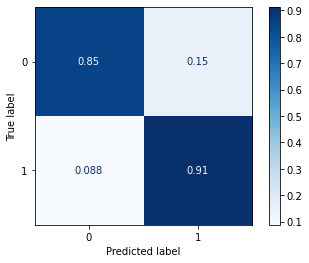

In [ ]:
plot_confusion_matrix(tree,X_test,y_test,cmap=plt.cm.Blues ,normalize='true')

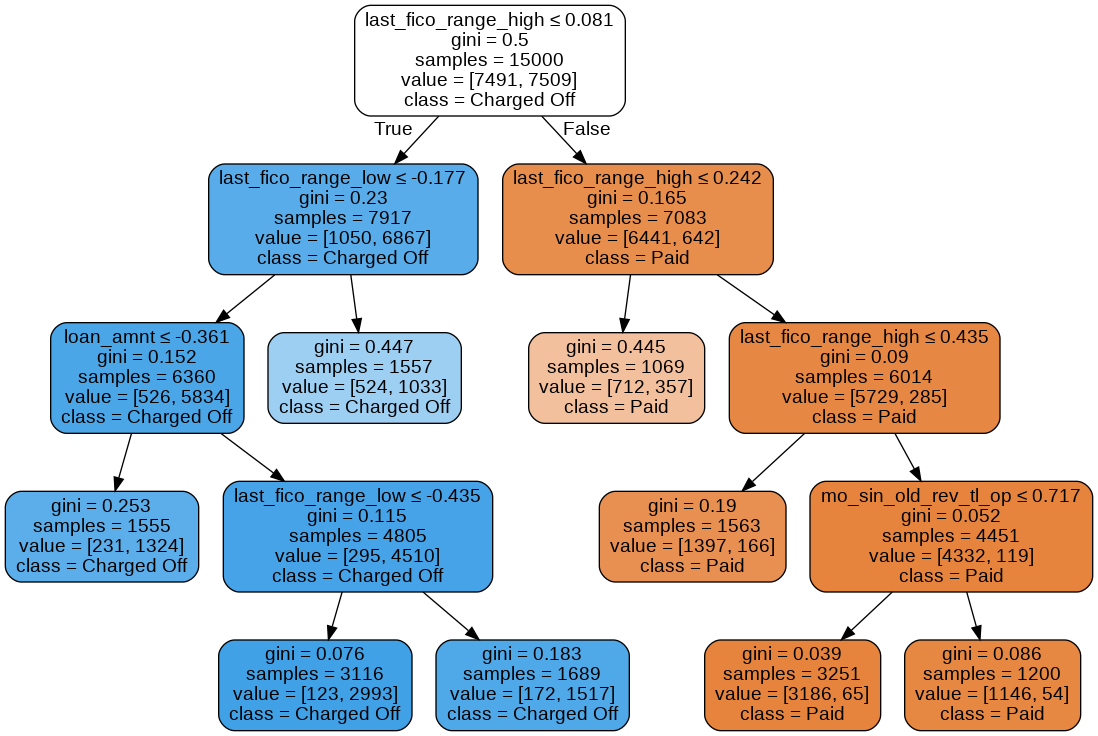

In [ ]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Paid', 'Charged Off'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
features = pd.concat([pd.Series(X.columns),pd.Series(tree.feature_importances_)],axis=1)
features.columns=['Feature','Importance']
features.sort_values(by='Importance')

Feature  Importance
96                          sub_grade_D1    0.000000
123                   emp_length_8 years    0.000000
124                   emp_length_9 years    0.000000
125                  emp_length_< 1 year    0.000000
126              home_ownership_MORTGAGE    0.000000
127                   home_ownership_OWN    0.000000
128                  home_ownership_RENT    0.000000
129  verification_status_Source Verified    0.000000
130         verification_status_Verified    0.000000
131                  purpose_credit_card    0.000000
122                   emp_length_7 years    0.000000
132           purpose_debt_consolidation    0.000000
134                        purpose_house    0.000000
135               purpose_major_purchase    0.000000
136                      purpose_medical    0.000000
137                       purpose_moving    0.000000
138                        purpose_other    0.000000
139             purpose_renewable_energy    0.000000
140               purpose_small_business    0.000000
141                     purpose_vacation    0.000000
142                        addr_state_AL    0.000000
133             purpose_home_improvement    0.000000
143                        addr_state_AR    0.000000
121                   emp_length_6 years    0.000000
119                   emp_length_4 years    0.000000
99                          sub_grade_D4    0.000000
100                         sub_grade_D5    0.000000
101                         sub_grade_E1    0.000000
102                         sub_grade_E2    0.000000
103                         sub_grade_E3    0.000000
104                         sub_grade_E4    0.000000
105                         sub_grade_E5    0.000000
106                         sub_grade_F1    0.000000
107                         sub_grade_F2    0.000000
120                   emp_length_5 years    0.000000
108                         sub_grade_F3    0.000000
110                         sub_grade_F5    0.000000
111                         sub_grade_G1    0.000000
112                         sub_grade_G2    0.000000
113                         sub_grade_G3    0.000000
114                         sub_grade_G4    0.000000
115                         sub_grade_G5    0.000000
116                 emp_length_10+ years    0.000000
117                   emp_length_2 years    0.000000
118                   emp_length_3 years    0.000000
109                         sub_grade_F4    0.000000
144                        addr_state_AZ    0.000000
145                        addr_state_CA    0.000000
146                        addr_state_CO    0.000000
172                        addr_state_NM    0.000000
173                        addr_state_NV    0.000000
174                        addr_state_NY    0.000000
175                        addr_state_OH    0.000000
176                        addr_state_OK    0.000000
177                        addr_state_OR    0.000000
178                        addr_state_PA    0.000000
179                        addr_state_RI    0.000000
180                        addr_state_SC    0.000000
171                        addr_state_NJ    0.000000
181                        addr_state_SD    0.000000
183                        addr_state_TX    0.000000
184                        addr_state_UT    0.000000
185                        addr_state_VA    0.000000
186                        addr_state_VT    0.000000
187                        addr_state_WA    0.000000
188                        addr_state_WI    0.000000
189                        addr_state_WY    0.000000
190                initial_list_status_w    0.000000
191           application_type_Joint App    0.000000
182                        addr_state_TN    0.000000
170                        addr_state_NH    0.000000
169                        addr_state_NE    0.000000
168                        addr_state_ND    0.000000
147                        addr_state_CT    0.000000
148                        addr_state_DC    0.000000
149  

Evaluation

In [ ]:
pred_dt

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
type(y_test)

pandas.core.frame.DataFrame

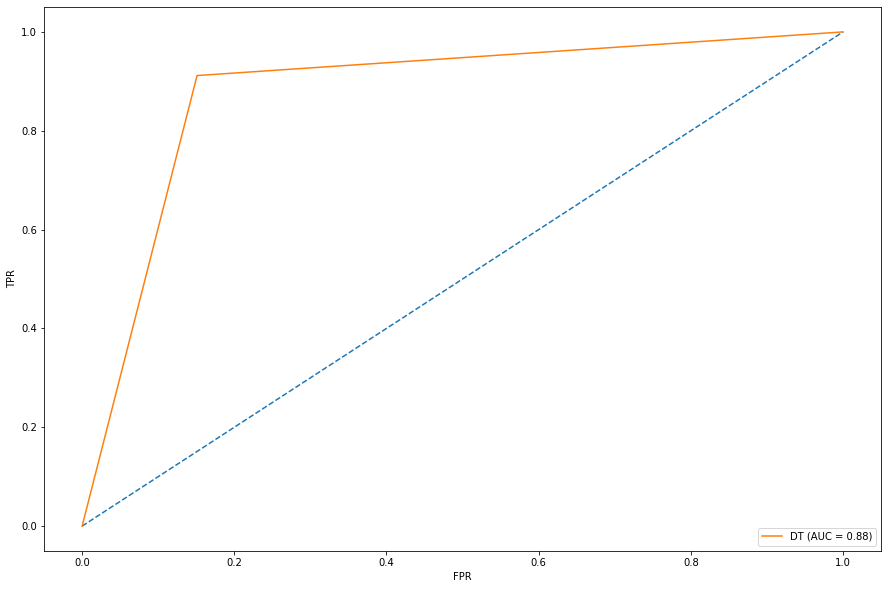

In [ ]:
# calculate scores
auc_dt = roc_auc_score(y_test, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [ ]:
auc_dt

0.880312928855558

In [ ]:
cross_val_score(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1000, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,  random_state=None, splitter='best'),X,y,scoring='roc_auc',cv=15)

array([0.94263401, 0.94576625, 0.93777437, 0.94870181, 0.93289225,
       0.94411465, 0.93841593, 0.94403699, 0.92960502, 0.93154887,
       0.93962028, 0.93285227, 0.93459464, 0.94801586, 0.9397621 ])

Test on Hold Out Data


In [ ]:
hold_out_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_data.csv')

In [ ]:
clean_missing_columns(hold_out_data,inplace = True)

# original cols: 150 #retained cols 106


In [ ]:
hold_out_data[TARGET]=encode_target(hold_out_data,TARGET,{'Fully Paid':0,'Current':0,'In Grace Period':0,'Late (31-120 days)':0,'Late (16-30 days)':0,'Default':1,'Charged Off':1})

In [ ]:
hold_out_data.loan_status.value_counts()

0    16616
1     3434
Name: loan_status, dtype: int64

In [ ]:
TRANSFORMED_COLUMNS = apply_custom_transformations(hold_out_data,transformations,inplace = True)

In [ ]:
manual_data_convertion(hold_out_data)

In [ ]:
missing_num_imputation(hold_out_data,NUM_FEATURES)

In [ ]:
dummies_hold_out_df = dummies_now(hold_out_data,CAT_FEATURES)
dummies_hold_out_df.index

RangeIndex(start=0, stop=20050, step=1)

In [ ]:
X_holdout = pd.concat([hold_out_data[NUM_FEATURES],dummies_hold_out_df],axis =1 )
X_holdout.reset_index(drop=True,inplace=True)

In [ ]:
rb = RobustScaler()
X_holdout[NUM_FEATURES]=rb.fit_transform(X_holdout[NUM_FEATURES])

In [ ]:
y_holdout = hold_out_data.loan_status

In [ ]:
y_hotpred = tree.predict(X_holdout)

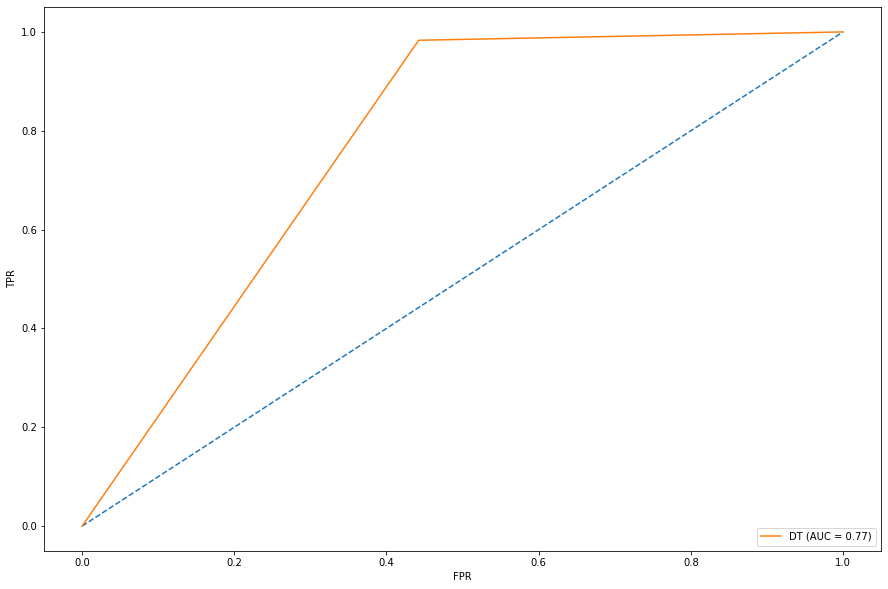

In [ ]:
# calculate scores
auc_dt = roc_auc_score(y_holdout, y_hotpred)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_holdout, y_hotpred)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()

In [ ]:
pd.Series(y_hotpred).value_counts()

1    10725
0     9325
dtype: int64

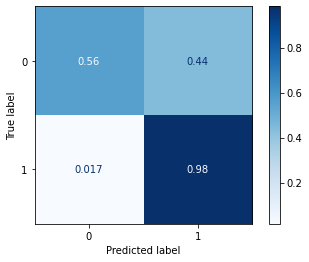

In [ ]:
plot_confusion_matrix(tree,X_holdout,y_holdout,cmap=plt.cm.Blues ,normalize='true')

In [ ]:
train_test_split?

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit?